In [ ]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import matplotlib.pyplot as plt

In [17]:
audio_file_dene = parselmouth.Sound(f'../rp2/selected_audio_files/1234567_0_VOW_1.wav')
pitch_dene = audio_file_dene.to_pitch()
print(audio_file_dene)

Object type: Sound
Object name: <no name>
Date: Mon Feb 17 11:08:19 2025

Number of channels: 2 (stereo)
Time domain:
   Start time: 0 seconds
   End time: 28.92 seconds
   Total duration: 28.92 seconds
Time sampling:
   Number of samples: 1388160
   Sampling period: 2.0833333333333333e-05 seconds
   Sampling frequency: 48000 Hz
   First sample centred at: 1.0416666666666666e-05 seconds
Amplitude:
   Minimum: -0.989990234 Pascal
   Maximum: 0.910003662 Pascal
   Mean: 1.05524129e-09 Pascal
   Root-mean-square: 0.0163881164 Pascal
Total energy: 0.00776705475 Pascal² sec (energy in air: 1.94176369e-05 Joule/m²)
Mean power (intensity) in air: 6.71425895e-07 Watt/m² = 58.27 dB
Standard deviation in channel 1: 0.00690133585 Pascal
Standard deviation in channel 2: 0.0221249331 Pascal



In [22]:
audio_file_ol = parselmouth.Sound(f'../rp2/selected_audio_files/1234568_0_VOW_1.wav')
pitch_ol = audio_file_ol.to_pitch()
print(audio_file_ol)

Object type: Sound
Object name: <no name>
Date: Mon Feb 17 11:11:03 2025

Number of channels: 2 (stereo)
Time domain:
   Start time: 0 seconds
   End time: 29.04 seconds
   Total duration: 29.04 seconds
Time sampling:
   Number of samples: 1393920
   Sampling period: 2.0833333333333333e-05 seconds
   Sampling frequency: 48000 Hz
   First sample centred at: 1.0416666666666666e-05 seconds
Amplitude:
   Minimum: -0.817718506 Pascal
   Maximum: 0.989990234 Pascal
   Mean: -1.17348355e-08 Pascal
   Root-mean-square: 0.0362783408 Pascal
Total energy: 0.0382200669 Pascal² sec (energy in air: 9.55501674e-05 Joule/m²)
Mean power (intensity) in air: 3.29029502e-06 Watt/m² = 65.17 dB
Standard deviation in channel 1: 0.0186127451 Pascal
Standard deviation in channel 2: 0.0478100787 Pascal



In [35]:
def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, 300)
    plt.ylabel("fundamental frequency [Hz]")
    plt.title("pitch_dene")

In [ ]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1891844853.py, line 5)

TypeError: Dimensions of C (312, 8208) should be one smaller than X(1388161) and Y(3) while using shading='flat' see help(pcolormesh)

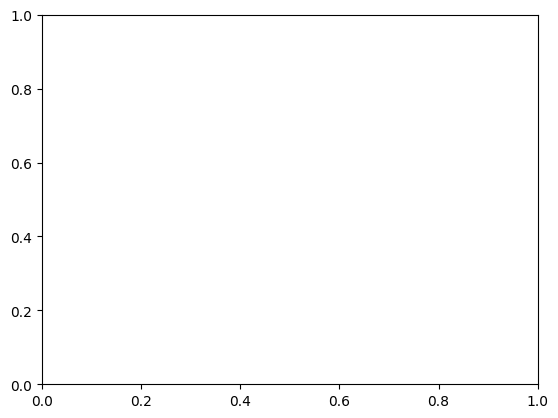

In [ ]:
spectrogram_dene = audio_file_dene.to_spectrogram(window_length=0.05, maximum_frequency=5500)
spectrogram_ol = audio_file_ol.to_spectrogram(window_length=0.05, maximum_frequency=5500)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
draw_pitch(pitch)
plt.xlim([sound.xmin, sound.xmax])
plt.show()

TypeError: Dimensions of C (312, 8208) should be one smaller than X(1388161) and Y(3) while using shading='flat' see help(pcolormesh)

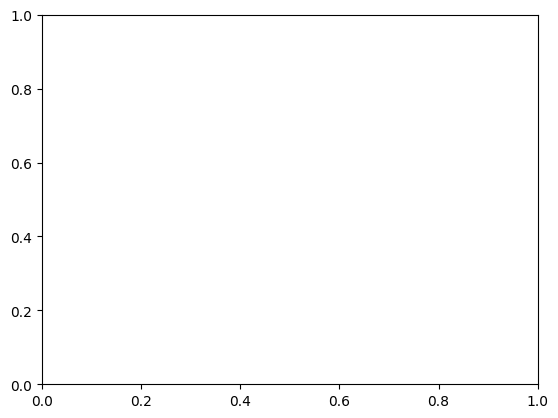

In [ ]:
spectrogram_dene = audio_file_dene.to_spectrogram(window_length=0.05, maximum_frequency=5500)
spectrogram_ol = audio_file_ol.to_spectrogram(window_length=0.05, maximum_frequency=5500)
draw_spectrogram(spectrogram, dynamic_range=70)
plt.twinx()
draw_pitch(pitch)
plt.xlim([sound.xmin, sound.xmax])
plt.show()

In [143]:
import parselmouth
from parselmouth.praat import call
import numpy as np
import pandas as pd

audio_file = 'selected_audio_files/1234567_0_VOW_1.wav'


sound = parselmouth.Sound(audio_file)
sound = sound.values[0,:-100:2]
sound_data = {
    'data': sound
}
df = pd.DataFrame(sound_data)

In [149]:
import parselmouth
from parselmouth.praat import call
import numpy as np

audio_file = 'selected_audio_files/1234567_0_VOW_1.wav'
sound = parselmouth.Sound(audio_file)
intensity = sound.to_intensity()
intensity_values = intensity.values
print(intensity_values[-100:])

[[-300.         -300.         -300.         ...   38.85344341
    38.55961977   38.59231579]]


In [ ]:
def extract_lowest_jitter_segment(audio_path, output_path, segment_length=1.0, step_size=0.1):
    # Load the sound file
    sound = parselmouth.Sound(audio_path)
    duration = sound.duration
    
    # Initialize variables to track lowest jitter
    min_jitter = float('inf')
    best_segment = (0, segment_length)

    # Iterate through overlapping windows
    start_time = 0
    while start_time + segment_length <= duration:
        end_time = start_time + segment_length
        segment = sound.extract_part(from_time=start_time, to_time=end_time, preserve_times=True)
        
        # Create PointProcess for jitter calculation
        point_process = segment.to_point_process_cc()
        jitter_local = call(point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
        
        # Update minimum jitter segment
        if jitter_local < min_jitter:
            min_jitter = jitter_local
            best_segment = (start_time, end_time)
        
        # Move window by step size (100 ms)
        start_time += step_size

    # Extract the best segment
    best_start, best_end = best_segment
    best_sound = sound.extract_part(from_time=best_start, to_time=best_end, preserve_times=True)
    
    # Save the extracted segment as a new WAV file
    best_sound.save(output_path, "WAV")